<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/Copy_of_SIAM2021_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Feature based classification
(20/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***



## <font color="green"> Learning outcomes:

* Implementing a neural network for feature based classification

* Using the ```CategoricalCrossentropy``` loss

* How to use ```EarlyStopping``` to prevent overfitting.

* Uses the build in softmax function

* Obtaining confusion matrix

## <font color="green">Data information:

* Features: 4 real-valued features

* Output: 3-class target represented by strings

## <font color="green">Tasks for participants (boolean)?

* No, follow along.

## Various Python imports

In [1]:
import numpy as np
np.random.seed(1337)
import pandas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dataset is obtained from scikit learn https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [2]:
iris_data = load_iris()

The load_iris() returns a 'sklearn.utils.Bunch' which is kind of like a Python dictionary with the following keys. In our case we don't need all of that information, we really just need the actual data (i.e. features and class variables). 

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

If you are interested in the Bunch object, here is the API https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [3]:
type(iris_data)

sklearn.utils.Bunch

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Nonetheless let's take a look at everything that we get when we call the iris_data() function.

In [5]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Now let's extract what we really want, the data, which is stored in the 'data' key in this iris_data dictionary. Calling the data key will provide us with the features in this case. Remember, this dataset is formatted in this particular way. Not every dataset will be stored in this way.

In [6]:
dataset = iris_data.data

## View the data

In [7]:
dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Scaling

You might already know that neural networks perform best when the features are scaled/normalised instead of being on different scales. Let's take a look and check if the features are on similar scales.

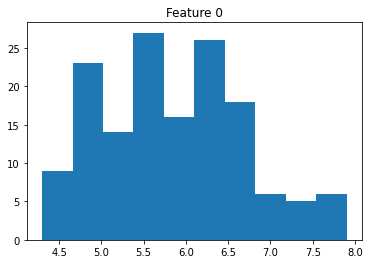

In [8]:
plt.hist(dataset[:,0])
plt.title('Feature 0')
plt.show()

In [9]:
print ('mean feature 0:',np.mean(dataset[:,0]))
print ('sdev feature 0:',np.std(dataset[:,0]))

mean feature 0: 5.843333333333334
sdev feature 0: 0.8253012917851409


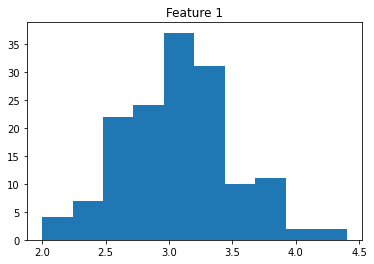

In [10]:
plt.hist(dataset[:,1])
plt.title('Feature 1')
plt.show()

In [11]:
print ('mean feature 1:',np.mean(dataset[:,1]))
print ('sdev feature 1:',np.std(dataset[:,1]))

mean feature 1: 3.0573333333333337
sdev feature 1: 0.4344109677354946


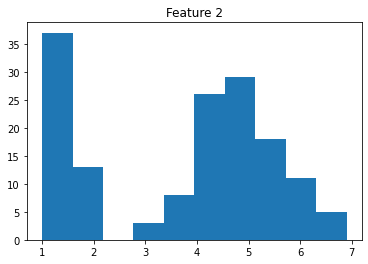

In [12]:
plt.hist(dataset[:,2])
plt.title('Feature 2')
plt.show()

In [13]:
print ('mean feature 2:',np.mean(dataset[:,2]))
print ('sdev feature 2:',np.std(dataset[:,2]))

mean feature 2: 3.7580000000000005
sdev feature 2: 1.759404065775303


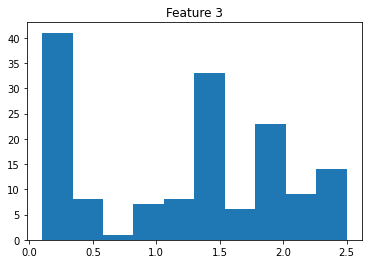

In [14]:
plt.hist(dataset[:,3])
plt.title('Feature 3')
plt.show()

In [15]:
print ('mean feature 3:',np.mean(dataset[:,3]))
print ('sdev feature 3:',np.std(dataset[:,3]))

mean feature 3: 1.1993333333333336
sdev feature 3: 0.7596926279021594


## Now let's scale the data

In [16]:
scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = scaler.transform(dataset)

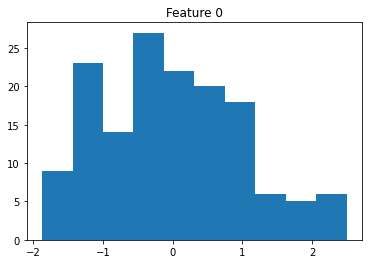

In [17]:
plt.hist(scaled_dataset[:,0])
plt.title('Feature 0')
plt.show()

In [18]:
print ('mean feature 0:',np.mean(scaled_dataset[:,0]))
print ('sdev feature 0:',np.std(scaled_dataset[:,0]))

mean feature 0: -1.4684549872375404e-15
sdev feature 0: 1.0


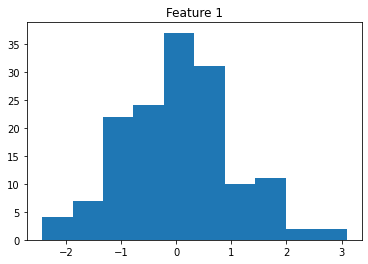

In [19]:
plt.hist(scaled_dataset[:,1])
plt.title('Feature 1')
plt.show()

In [20]:
print ('mean feature 1:',np.mean(scaled_dataset[:,1]))
print ('sdev feature 1:',np.std(scaled_dataset[:,1]))

mean feature 1: -1.8237263551175904e-15
sdev feature 1: 1.0000000000000004


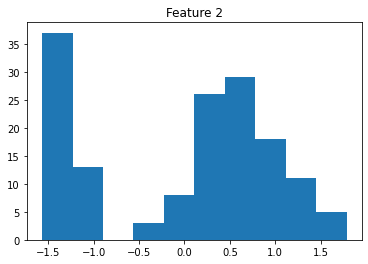

In [21]:
plt.hist(scaled_dataset[:,2])
plt.title('Feature 2')
plt.show()

In [22]:
print ('mean feature 2:',np.mean(scaled_dataset[:,2]))
print ('sdev feature 2:',np.std(scaled_dataset[:,2]))

mean feature 2: -1.6105635343895603e-15
sdev feature 2: 0.9999999999999999


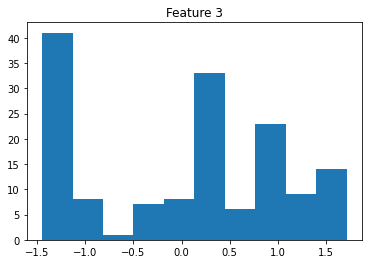

In [23]:
plt.hist(scaled_dataset[:,3])
plt.title('Feature 3')
plt.show()

In [24]:
print ('mean feature 3:',np.mean(scaled_dataset[:,3]))
print ('sdev feature 3:',np.std(scaled_dataset[:,3]))

mean feature 3: -9.473903143468002e-16
sdev feature 3: 1.0


## Check the shape of the data

It is generally a good idea to check your data once you conduct some manipulation.

In [25]:
scaled_dataset.shape

(150, 4)

Okay so we have 150 examples and 4 features. Next we need to create our X and Y variables.

## Split the data into features and the class values

The dataset above (when we loaded it) had another key in the 'Bunch' called 'target'. So we can call that key and get the values of the classes.

In [26]:
X = scaled_dataset
Y = iris_data.target

Let's take a look at the unique values in the Y target variable

In [27]:
np.unique(Y)

array([0, 1, 2])

Okay so we cannot leave the targets as integer values. We don't want a neural network to assume that 2 is greater than 1 or that the targets have ordinal meaning (1 > 0, 2> 1 etc...). 

We also cannot train a neural network on categorical data represented as text. For example in this example, [0,1,2] corresponds to ['setosa', 'versicolor', 'virginica']. If instead of the numbers, the Y variable had strings of classes (e.g. Y = ['setosa', 'setosa', 'versicolor' ...  , 'versicolor'])

To deal with this, we can convert out targets into one-hot encoded vectors. Keras has a function called 'np_utils.to_categorical()' which helps us achieve this.

## One hot encoding

In [28]:
Y = np_utils.to_categorical(Y)

Let's take a look at the first 5 examples after applying the encoding:

In [29]:
Y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Okay so clearly the targets have been converted into their one-hot encoded vectors! Great, now let's double check the shapes of X and Y before creatining our training, validation and test splits.

## Check the shapes of the data

In [30]:
X.shape

(150, 4)

In [31]:
Y.shape

(150, 3)

## Split the data into training and test data

After inspection, the shapes look correct and the target values look correct too (dimensions of 3 since we have 3 unique classes). Once we have our data into X (features) and Y (class) variables we can proceed to the next step which is to create training and testing data. This is similar to the previous notebook.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

## Create a neural network model

Some points to keep in mind everytime you define a model:

* Remember to specify and intput dimension for the first layer (this is always  the case for the first layer only)
* You will have to define a model architecture, how many layers, how many units etc...
* You will have to compile the model, specify a loss function and optimiser. The metric is not used in any calculation, it is an easy-to-use evaluation metric for us humans to monitor the model. API documentation on metrics is here: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

We specify the loss function as a Tensorflow.keras.losses object, in this case categorical cross entropy loss. The API documentation is here: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy 

In the examples so far we have been calling activation functions by their pre-defined names such as 'linear', 'relu' and 'softmax'. But other activation functions exist. The formal document is available, here is an example for ReLU https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu and you can see that we can use it as: tf.keras.activations.relu we can import it and then use it as follows:

```from tensorflow.keras.activations import relu```

and then we would use it within a layer as follows

```model.add(Dense(2, input_dim=4, activation=relu, kernel_initializer = initializer))```

Notice in the above example we wrote ```activation=relu``` instead of ```activation='relu'```. 


In [33]:
def baseline():
  
    # Seeting a seed so we can reproduce the results
    tf.random.set_seed(137)

    # Define the initialisation method
    initializer = RandomNormal(mean = 0.0, stddev=0.01)

    # create a squential model
    model = Sequential()

    # add one fully connected layer
    model.add(Dense(2, input_dim=4, activation='relu', kernel_initializer = initializer))

    # add one fully connected output layer with a softmax activation
    model.add(Dense(3, activation='softmax', kernel_initializer = initializer))

    # Define the optimiser
    optimiser = Adam(learning_rate=0.001)

    # Define the loss function
    loss = CategoricalCrossentropy()
    
    # Compile model
    model.compile(loss=loss, 
                  optimizer=optimiser, 
                  metrics=['accuracy'])
    
    return model

## Initialise the model

To initialise the model, we call our Python function which contains the model.

In [34]:
model = baseline()

## Determine the number of trainable parameters

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


We can also view the model by plotting it. It gives a different perspective if you prefer this view. To do this we use the plot_model() function.

API documentation for the plot_model() function https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model?hl=en

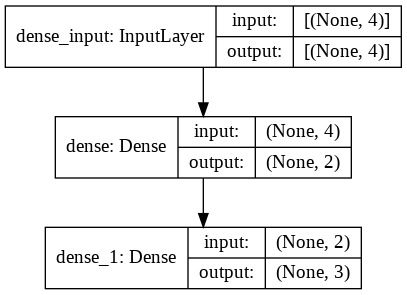

In [36]:
plot_model(model, show_shapes=True)

Let's add something new.

Sometimes when we train models we can end up in situations where the network overfits and only gets worse. One way to handle this is to stop training once the validation loss does not improve over a certain number of epochs. Tensorflow has something called 'EarlyStopping' which does exactly that. Namely, it will stop training when a monitored metric has stopped improving. API: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping?hl=en

In this example, we can monitor the validation accuracy. We want the validation loss to increase so we tell it that the 'mode' is to keep an eye if the validation accuracy is increasing. Formally, "in min mode, training will stop when the quantity monitored has stopped decreasing" The converse for max.

We also specify a patience arguement. Formally, "number of epochs with no improvement after which training will be stopped". In our example, we will wait for 10 epochs.

Here is the code to create this and then we need to add it to our fit function.

In [37]:
stopping = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

## Fit the model

Now that we have the training, validation and testing features and targets we can start training the network. To do this, we make use of the .fit() function like in the previous notebook. 

Here we add our callback which we created above 'stopping'. A callback is formally defined as "utilities called at certain points during model training." We specify them in an array as we can add multiple callsbacks. In this example we only have one. In this example I specify a high number of epochs, let's see what happens, will it run for 400 epochs or stop before that?

In [38]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 400, callbacks=[stopping])

Epoch 1/400
3/3 [==============================] - 1s 91ms/step - loss: 1.0985 - accuracy: 0.3562 - val_loss: 1.0981 - val_accuracy: 0.4375
Epoch 2/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0984 - accuracy: 0.3699 - val_loss: 1.0978 - val_accuracy: 0.4375
Epoch 3/400
3/3 [==============================] - 0s 12ms/step - loss: 1.0980 - accuracy: 0.3699 - val_loss: 1.0978 - val_accuracy: 0.4375
Epoch 4/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0976 - accuracy: 0.4384 - val_loss: 1.0976 - val_accuracy: 0.5312
Epoch 5/400
3/3 [==============================] - 0s 12ms/step - loss: 1.0972 - accuracy: 0.5890 - val_loss: 1.0973 - val_accuracy: 0.5625
Epoch 6/400
3/3 [==============================] - 0s 12ms/step - loss: 1.0966 - accuracy: 0.6849 - val_loss: 1.0969 - val_accuracy: 0.5938
Epoch 7/400
3/3 [==============================] - 0s 11ms/step - loss: 1.0958 - accuracy: 0.6986 - val_loss: 1.0966 - val_accuracy: 0.6250
Epoch 8/400
3/3 [===

## Plot the loss over the epochs

Keep an eye out for over fitting.

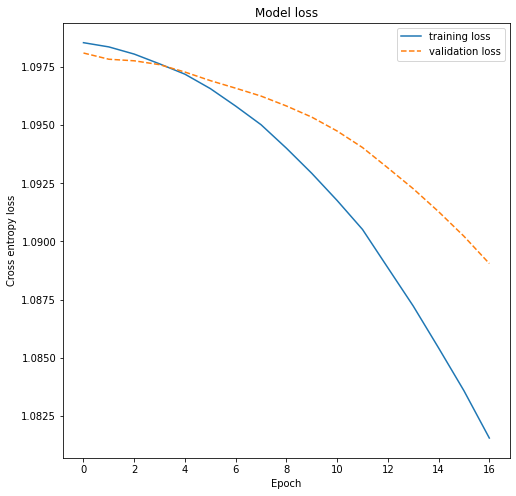

In [39]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss', linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

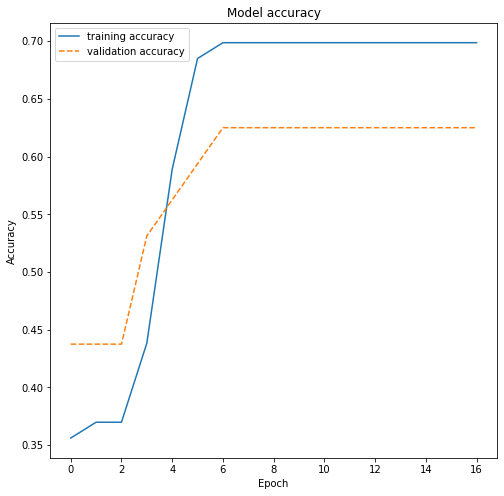

In [40]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy', linestyle='dashed')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Predict on the test data

In [41]:
prediction = model.predict(X_test)

## View predictions

The predictions in this example are different to the previous notebooks. In this example the output is softmax outputs. Note the performance is pretty bad. The model provided above is not necessarily the best model :) Here we display the predictions on the first 5 testing examples

In [42]:
prediction[0:5]

array([[0.335138  , 0.33867076, 0.3261912 ],
       [0.3515605 , 0.33040816, 0.31803128],
       [0.33406746, 0.33920953, 0.326723  ],
       [0.351882  , 0.33024597, 0.317872  ],
       [0.33406746, 0.33920953, 0.326723  ]], dtype=float32)

## Predict classes (instead of softmax output)

Here we use np.argmax() on the predictions to get the corresponding class (i.e. not the softmax but the iteger representations)


In [43]:
prediction_classes = np.argmax(model.predict(X_test), axis=-1)

Let's take a look at the predictions for the first 10 testing points and compare them to the correct values.

In [44]:
prediction_classes[0:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

Y_test is currently in one-hot encoded vector form. We can use the np.argmax() function to convert the vectors back into integer values.

In [45]:
np.argmax(Y_test,axis=1)[0:10]

array([1, 0, 2, 0, 2, 0, 0, 0, 1, 2])

## Compute the confusion matrix

Scikit learn has a class called confusion_matrix API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix which can compute the confusion matrix for us. This won't work on softmax output so we need to apply ```np.argmax()```. We have already done this for the model predictions. We imported this at the very top of the script.

In [46]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[20,  0,  0],
       [ 0,  9,  0],
       [ 0, 16,  0]])

## Compute the accuracy

Scikit learn has a class called accuracy_score, API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score which can compute multiclass/binary class accuracy. We imported this at the top of the script. Again, it does not work on softmax values.

Accuracy is suitable in this example but for some examples one might want to consider different performance metrics. Additional options are available, take a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [47]:
accuracy_score(np.argmax(Y_test,1), prediction_classes)

0.6444444444444445

# Task

Try to improve the model accuracy by modifying the network. 

* You could try adding more layers, using different activation functions or 

* changing the number of units in each fully connected layer. 

The particular network I provided here was deliberately not optimal and thus the performance can definitely be improved :)

In [48]:
def baseline_mod():
  
    # Seeting a seed so we can reproduce the results
    tf.random.set_seed(137)

    # Define the initialisation method
    initializer = RandomNormal(mean = 0.0, stddev=0.01)

    # create a squential model
    model = Sequential()

    # add one fully connected layer
    model.add(Dense(4, input_dim=4, activation='relu', kernel_initializer = initializer))
    model.add(Dense(8, activation='relu', kernel_initializer = initializer))
    #model.add(Dense(16,  activation='relu', kernel_initializer = initializer))
    # add one fully connected output layer with a softmax activation
    model.add(Dense(3, activation='softmax', kernel_initializer = initializer))

    # Define the optimiser
    optimiser = Adam(learning_rate=0.01)

    # Define the loss function
    loss = CategoricalCrossentropy()
    
    # Compile model
    model.compile(loss=loss, 
                  optimizer=optimiser, 
                  metrics=['accuracy'])
    
    return model

In [49]:
model1 = baseline_mod()

In [50]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


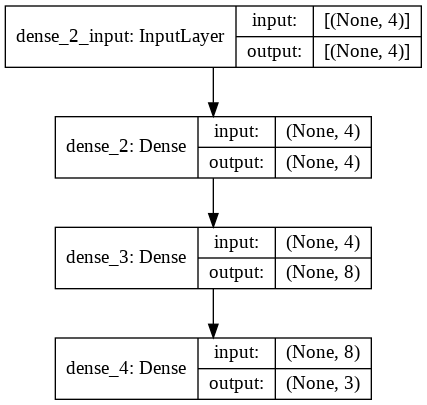

In [51]:
plot_model(model1, show_shapes=True)

In [52]:
stopping = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [53]:
history1 = model1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 200, callbacks=[stopping])

Epoch 1/200
3/3 [==============================] - 1s 74ms/step - loss: 1.0989 - accuracy: 0.3425 - val_loss: 1.0947 - val_accuracy: 0.4375
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 1.0986 - accuracy: 0.3699 - val_loss: 1.0918 - val_accuracy: 0.4375
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0958 - accuracy: 0.3699 - val_loss: 1.0887 - val_accuracy: 0.4375
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 1.0895 - accuracy: 0.3699 - val_loss: 1.0772 - val_accuracy: 0.4375
Epoch 5/200
3/3 [==============================] - 0s 10ms/step - loss: 1.0755 - accuracy: 0.3699 - val_loss: 1.0528 - val_accuracy: 0.4375
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0501 - accuracy: 0.3973 - val_loss: 1.0138 - val_accuracy: 0.5938
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0110 - accuracy: 0.7534 - val_loss: 0.9603 - val_accuracy: 0.8438
Epoch 8/200
3/3 [===

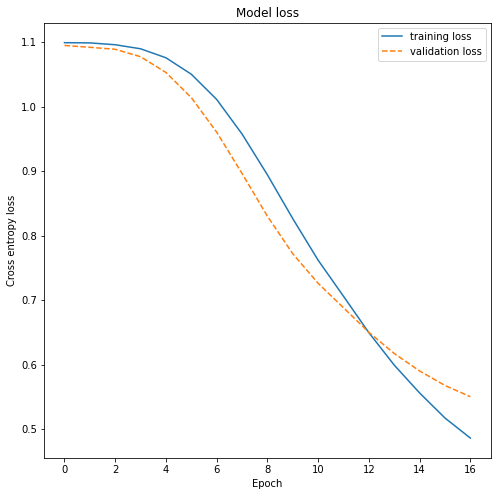

In [54]:
plt.figure(figsize=(8, 8))
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss', linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

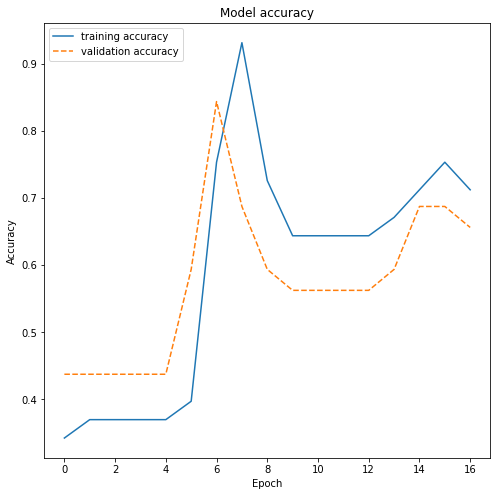

In [55]:
plt.figure(figsize=(8, 8))
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='validation accuracy', linestyle='dashed')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [56]:
prediction = model1.predict(X_test)

In [57]:
prediction_classes = np.argmax(model1.predict(X_test), axis=-1)

In [58]:
prediction_classes[0:10]

array([1, 0, 2, 0, 2, 0, 0, 0, 2, 2])

In [59]:
np.argmax(Y_test,axis=1)[0:10]

array([1, 0, 2, 0, 2, 0, 0, 0, 1, 2])

In [60]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[20,  0,  0],
       [ 0,  3,  6],
       [ 0,  0, 16]])

In [61]:
accuracy_score(np.argmax(Y_test,1), prediction_classes)

0.8666666666666667